In [1]:
import cv2

In [2]:
import cv2

file_path = r"C:\Users\youse\OneDrive\Desktop\20240410_065844.jpg"
print("Attempting to load image from:", file_path)

img = cv2.imread(file_path)

if img is None:
    print("Error: Unable to read image. OpenCV error:", cv2.error)
else:
    print("Image loaded successfully")



Attempting to load image from: C:\Users\youse\OneDrive\Desktop\20240410_065844.jpg
Image loaded successfully


In [3]:
img.shape

(2544, 3392, 3)

In [4]:
img[0]

array([[186, 120,  79],
       [186, 120,  79],
       [186, 120,  79],
       ...,
       [181, 124,  92],
       [181, 124,  92],
       [181, 124,  92]], dtype=uint8)

In [5]:
import matplotlib.pyplot as plt

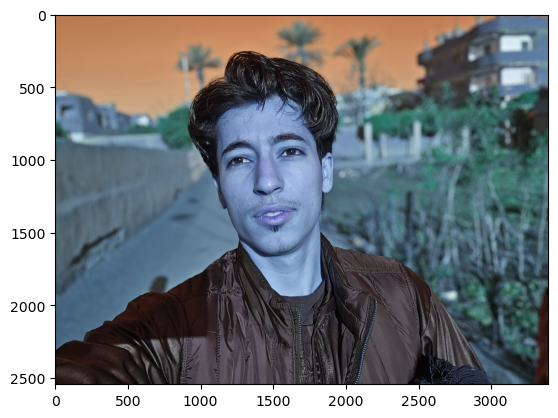

In [6]:
plt.imshow(img)

In [7]:
while True:
    cv2.imshow('result', img)
    #27 - ASCII Escape
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()


In [8]:
# Initialize cascade classifier with XML file
cascade_file = r'C:\Face-Mask-Detection-master\haarcascade_frontalface_default.xml'
haar_data = cv2.CascadeClassifier(cascade_file)

# Check if cascade classifier is loaded successfully
if haar_data.empty():
    print("Error: Cascade classifier is not initialized or empty")
else:
    print("Cascade classifier loaded successfully")

Cascade classifier loaded successfully


In [9]:
haar_data.detectMultiScale(img)

array([[ 962,  588,  975,  975],
       [2136, 1416,   67,   67],
       [2010, 1795,   71,   71],
       [ 667, 2499,   33,   33],
       [1149, 1748,   34,   34],
       [2202, 1349,  252,  252],
       [1809, 1306,  510,  510],
       [1687, 2102,  106,  106],
       [2599, 2156,   26,   26],
       [2652, 2346,   26,   26],
       [1568, 2106,   85,   85]])

In [10]:
#cv2.rectangle(img,(x,y),(w,h),(b,g,r),border_thickness)

In [10]:
# Initialize cascade classifier with XML file
cascade_file = r'C:\Face-Mask-Detection-master\haarcascade_frontalface_default.xml' # in case of trying to run the proggram while grading please make sure
# to change the path in all reqiuered paths
haar_data = cv2.CascadeClassifier(cascade_file)

# Check if cascade classifier is loaded successfully as it alwas gave me an errolr\
if haar_data.empty():
    print("Error: Cascade classifier is not initialized or empty")
else:
    print("Cascade classifier loaded successfully")

# Assuming img is loaded properly
# Perform object detection using detectMultiScale to detect the face 
faces = haar_data.detectMultiScale(img)




Cascade classifier loaded successfully


In [11]:
while True:
    # Check if haar_data is empty
    if haar_data.empty():
        print("Error: Cascade classifier is not initialized or empty")
        break
 
    # Perform face  detection
    faces = haar_data.detectMultiScale(img)

    # Check if anyfaces are detected
    if len(faces) == 0:
        print("No faces detected")
    else:
        # Draw rectangles around detected faces
        for x, y, w, h in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 4)

    # Display the result
    cv2.imshow('result', img)
    
    # Check if the window is closed or ESC key is pressed
    key = cv2.waitKey(2)
    if key == 27:  # ESC key
        break
    elif key == -1:  # No key pressed
        continue

cv2.destroyAllWindows()


In [12]:
capture = cv2.VideoCapture(0)  
data = [] # intializing 
data_without_mask =[] # 
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        # Check if any faces are detected
        if len(faces) > 0:
            # Draw rectangles around detected faces
            for x, y, w, h in faces:
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 4)
                face= img[y:y+h, x:x+w, :]
                face = cv2.resize(face, (50,50))
                print(len(data))
                if len(data) < 400:
                    data.append(face)

            # Display the result
            cv2.imshow('result', img)
            
            # Check if the window is closed or ESC key is pressed
            key = cv2.waitKey(100)  # Increase delay to 100 milliseconds
            if key == 27 or len(data) >= 200:  # ESC key
                break
    else:
        print("Error: Unable to capture frame from camera")
        break

capture.release()
cv2.destroyAllWindows()


0
1
2
3
4
5
6
7
8
9


In [13]:
import numpy as np

In [14]:
np.save('without_mask.npy', data)

In [15]:
np.save('with_mask', data)

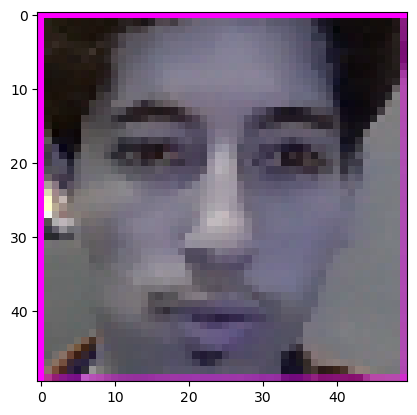

In [48]:
plt.imshow(data[3])